# CREATE A COPY FIRST!

## **Question 2: Arabic Handwritten Character Search**

Ali’s younger brother is learning to write Arabic characters. One day, he wrote a character that looks like **"ب"**, and Ali wants to find **the most similar 5 images** from a dataset of handwritten Arabic characters.

📝 **Your Task:**  
Complete the missing code cells below by implementing **image search** to find the most similar 5 images to the given input character.  



# Download Data

### Query Image

In [2]:
# # Please uncomment this out when you are running this lab on google colab!
import os

# # Set KaggleHub cache to a directory inside /content/
os.environ["KAGGLEHUB_CACHE"] = "/content/data"

100%|██████████| 320/320 [00:00<00:00, 551kB/s]

Extracting files...


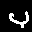

In [3]:
import kagglehub
from PIL import Image
import os

path = kagglehub.dataset_download("mohammad2012191/character")
raw_query_image = Image.open(os.path.join(path,"char.png"))
raw_query_image

### Arabic Characters Dataset

In [4]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("mohammad2012191/arabic-chars")

print("Path to dataset files:", dataset_path)

100%|██████████| 219k/219k [00:00<00:00, 53.1MB/s]

Extracting files...
Path to dataset files: /content/data/datasets/mohammad2012191/arabic-chars/versions/3


In [8]:
#Just Exploring the dataset
#It seems that the labels are the order of the character in the alphabet which is part of the image name
from PIL import Image
for root, dirs, files in os.walk(dataset_path):

    print(f"Current Directory: {root}")

    print(f"Subdirectories: {dirs}")

    print(f"Files: {files}")
    image =  Image.open("/content/data/datasets/mohammad2012191/arabic-chars/versions/3/chars images/id_1989_label_15.png")

Current Directory: /content/data/datasets/mohammad2012191/arabic-chars/versions/3
Subdirectories: ['chars images']
Files: []
Current Directory: /content/data/datasets/mohammad2012191/arabic-chars/versions/3/chars images
Subdirectories: []
Files: ['id_1989_label_15.png', 'id_493_label_23.png', 'id_2095_label_12.png', 'id_2642_label_5.png', 'id_270_label_23.png', 'id_3186_label_25.png', 'id_294_label_7.png', 'id_1875_label_14.png', 'id_2385_label_17.png', 'id_2902_label_23.png', 'id_3157_label_11.png', 'id_2719_label_16.png', 'id_2153_label_13.png', 'id_2309_label_7.png', 'id_2981_label_7.png', 'id_864_label_12.png', 'id_3047_label_12.png', 'id_919_label_12.png', 'id_527_label_12.png', 'id_1607_label_20.png', 'id_347_label_6.png', 'id_13229_label_2.png', 'id_2240_label_28.png', 'id_1014_label_3.png', 'id_2114_label_21.png', 'id_1339_label_26.png', 'id_1366_label_11.png', 'id_1433_label_17.png', 'id_340_label_2.png', 'id_890_label_25.png', 'id_2477_label_2.png', 'id_977_label_13.png', 'id

In [14]:
path2 = "/content/data/datasets/mohammad2012191/arabic-chars/versions/3/chars images/id_1989_label_15.png"
print(path2.split("/")[-1].split("_")[3].split(".")[0])

15


# TASK 1: Complete the following code to build a custom dataset class for the data

In [15]:
import os
import glob
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class ArabicHandwritingDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_paths =  glob.glob(f"{root_dir}/*.png")########################### TO DO: Use glob to extract images paths from root_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image =  Image.open(img_path)########################### TO DO: Write a line to load the image from img_path
        label = int(img_path.split("/")[-1].split("_")[3].split(".")[0])########################### TO DO: Write a line to extract the label from img_path
        if self.transform:
            image = self.transform(image)
        return image, label

In [23]:
transform = transforms.Compose([
    transforms.Grayscale(3),
    transforms.Resize((32,32)), ########################### TO DO: Resize to 32*32
    transforms.ToTensor(),########################### TO DO: Convert to Tensor
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),########################### TO DO: Normalize using Imagenet mean and std
])


train_dataset = ArabicHandwritingDataset(root_dir=os.path.join(dataset_path,"chars images"), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)########################### TO DO
print(f"Total images: {len(train_dataset)}")



transformed_query_image = raw_query_image.transform########################### TO DO: Apply the transform to raw_query_image

Total images: 668


# TASK 2: Use EfficientNet B3 to extract features.

##### import using:
from torchvision.models import efficientnet_b3

### Extract Features for the dataset images

In [ ]:
# TO DO: Load pretrained efficientnet_b3 model

# TO DO: Use efficientnet_b3 to extract features

# TO DO: Convert features to numpy and concatenate them.

# TO DO: Concatenate the raw images tensors

In [22]:
import torch
import torchvision.models as models
from torch import nn
from tqdm import tqdm

# Load pretrained EfficientNetV2-S model
device = "cuda" if torch.cuda.is_available() else "cpu"
efficientnet = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
efficientnet.eval().to(device)


# input (image)  --> Conv layers (Feature Extraction) --> Fully Connected Layers (classification) -->


# Modify EfficientNetV2-S to extract features before classification
def extract_features(image_tensor):
    image_tensor = image_tensor.to(device)
    with torch.no_grad():
        features = efficientnet.features(image_tensor)  # Extract features
        features = torch.flatten(features, start_dim=1)  # Flatten before passing to classifier
        # features = efficientnet.classifier[0](features)  # Pass through first layer of classifier
    return features

# Extract features for all images
all_features = []
image_tensors = []


for images, _ in tqdm(train_loader):
    image_tensors.append(images)
    features = extract_features(images)
    all_features.append(features.cpu())


print(f"all_features shapes {torch.cat(all_features).shape}")

# Convert to numpy
all_features = torch.cat(all_features).numpy()
image_tensors = torch.cat(image_tensors)


print(f"image_tensors shapes {image_tensors.shape}")

100%|██████████| 668/668 [00:23<00:00, 27.85it/s]

all_features shapes torch.Size([668, 1536])
image_tensors shapes torch.Size([668, 3, 32, 32])


### Extract Features for the query image

In [24]:
### TO DO: Fix the error in this line so it extracts features from the query image successfully
query_image_feats = extract_features(transformed_query_image)

AttributeError: 'function' object has no attribute 'to'

# TASK 3: Get the indices of top 5 images using Cosine Similarity

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import torch
import random

# Select a random query image
random_idx = random.randint(0, len(pca_features) - 1)
query_image = image_tensors[random_idx]

# Compute cosine similarity
similarities = cosine_similarity(, query_features.reshape(1, -1)).reshape(-1)

# Get top 5 similar images
top_indices = similarities.argsort()[-6:-1][::-1]  # Ignore query itself

# Display query & retrieved images with similarity scores
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

# Query image
axes[0].imshow(query_image.permute(1, 2, 0).numpy())
axes[0].set_title("Query Image")
axes[0].axis("off")

# Retrieved similar images with similarity scores
for i, idx in enumerate(top_indices):
    image = image_tensors[idx]
    similarity_score = similarities[idx]  # Get similarity score
    axes[i + 1].imshow(image.permute(1, 2, 0).numpy())
    axes[i + 1].set_title(f"Similar {i+1}\n{100*similarity_score:.2f}%")  # Show similarity score
    axes[i + 1].axis("off")

plt.show()


# TASK 4: Fix the errors in the following code to plot the most 5 similar images

In [ ]:
# Display query & retrieved images with similarity scores
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

# Query image
axes[0].imshow(image)
axes[0].set_title("Query Image")
axes[0].axis("off")

# Retrieved similar images with similarity scores
for i, idx in enumerate(top_indices):
    image = image_tensors[idx]
    similarity_score = similarities[idx]  # Get similarity score
    axes[i + 1].imshow(image))
    axes[i + 1].set_title(f"Similar {i+1}\n{100*similarity_score:.2f}%")  # Show similarity score
    axes[i + 1].axis("off")

plt.show()


# Bonus Task:  Get the indices of the most 5 *dissimilar* images and plot them

In [ ]:
### TO DO